# Workshop: Projectile Motion

##An introduction to computing trajectories

This workshop focuses on introducing computations to introductory physics. Introducing computations should lead to a sense of empowerment
For this to be possible, the computations must
1. Relate to well-known problems
2. Be shown to be a powerful tool
3. Be understandable. Students should write their own code

**The goal is to find the velocity and position of an object as functions of time: $\mathbf{\vec{v}(t), \vec{r}(t) }$**
 ![cannonball](figs\cannonball.svg)
Equations of motion:
$$ \frac{d \vec{r}}{d t} = \vec{v}(t), \qquad \frac{d \vec{v}}{d t} = \vec{a}(t)$$


Newtons 2. law of motion:
$$ \vec{F} = m\vec{a}$$
 ![cannonballforces](figs\cannonballforces.svg)

$$ \vec{F}(r,v,t) = m\vec{a}(r,v,t).$$

Our algorithm is now as follows
1. Find the physical forces of the system.
2. Use Newtons 2. law to find the acceleration
3. Calculate ~ v(t) and~ r(t) by solving the equations of motion
In this workshop, we will solve step number 3 numerically,
using the Euler method.

## The Euler Method
### A method for solving ordinary differential equations (ODEs)

We can solve the equations of motion numerically using the Euler method
From the definition of the derivative

$$\frac{d v}{d t} = \lim_{\Delta t \to 0} \frac{v(t+\Delta t) - v(t)}{\Delta t} =  a(t)$$


We now remove the limit, making $\Delta t$ a very small constant

$$\frac{v(t+\Delta t) - v(t)}{\Delta t} \approx  a(t)$$

Solving for $v(t+\Delta t)$ gives
$$ v(t+\Delta t) \approx v(t) + a(t)\cdot \Delta t $$


We can solve the equations of motion by stepping forward in time 
$$v(t+\Delta t) = v(t) + a(t)\cdot \Delta t$$

If $a(t)$ and $v(t)$ are known, we can calculate $v(t+\Delta t)$
 ![plot of eulers method](figs\eulers0.svg)

###Our functions are no longer continuous, they have become discretized
We only focus on multiples of our time-step


\begin{align*}
t  & \in \{ 0,\ \Delta t,\  2\Delta t, \ 3\Delta t,  \ldots \} \\
t_i & \equiv i\cdot\Delta t
\end{align*}

Introduce the shorthand
\begin{align*}
v(t_i) & \equiv v_i \\
r(t_i) & \equiv r_i \\
\end{align*}
 ![time discretization](figs\time_discretization.svg)

###We solve the equations of motion iteratively


$$ v_{i+1} = v_i + a_i\cdot\Delta t$$

$$r_{i+1} = r_i + v_i\cdot \Delta t$$

For each time step, we must calculate the acceleration
$$ a_i = a(r_i, v_i, t_i).$$


We repeat these steps, starting at our initial conditions $v_0$ and $r_0$, until we have reached our end-time $t_N$
$$ i = 0,1,2,3,\ldots, N.$$

### Algorithm for the Euler method
for $i=0,1,2,3,\ldots, N-1$:
1. Use the previous results $x_i$ and $v_i$ to compute the acceleration: $ a_i = F(x_i, v_i, t_i)/m$.
2. Compute the new velocity: $ v_{i+1} = v_i + a_i\Delta t$.
3. Compute the new position: $ r_{i+1} = r_i + v_i\Delta t$.


##Implementation
###Moving from physics and math to actual computer code

for $i=0,1,2,3,\ldots, N-1$:
1. Use the previous results $x_i$ and $v_i$ to compute the acceleration: $ a_i = F(x_i, v_i, t_i)/m$.
2. Compute the new velocity: $ v_{i+1} = v_i + a_i\Delta t$.
3. Compute the new position: $ r_{i+1} = r_i + v_i\Delta t$.

In [ ]:
for i in range(N):
	a[i] = F(r[i], v[i], t[i])/m
	v[i+1] = v[i] + a[i]*dt
	r[i+1] = r[i] + v[i]*dt
	

We want the code to look as much as possible like the physics and math we write on paper
$$ t_i \Rightarrow \texttt{t[i]} \qquad  v_i \Rightarrow \texttt{v[i]} \qquad  r_i  \Rightarrow \texttt{r[i]}$$

###We also need various pieces of bookkeeping code
Here we define the arrays we will be using

In [18]:
#Import various functions meant for numerical science
import numpy as np 
from math import cos,sin,pi

t_0 = 0 # Start time, s
t_end = 10 # End time, s
N = 1000 # Number of time steps

# Create a uniformly spaced time-array
t = np.linspace(t_0, t_end, N+1)

# Calculate the size of a time step
dt = t[1] - t[0]

# Create empty acceleration, velocity and position arrays
a = np.zeros((N+1,2))
v = np.zeros((N+1,2))
r = np.zeros((N+1,2))

# Set initial conditions
v[0] = (100*cos(pi/6), 100*sin(pi/6)) # inital velocity, m/s
r[0] = (0,1)  # initial position, m

Here we define the physical constants for our system and the function that describes the forces

In [17]:
m = 5.5 # mass, kg
g = 9.81 # acceleration of gravity, m/s^2
rho = 1.3 # air density, kg/m^3
C_D = 0.45 # drag coefficient
d = 0.11 # diameter of cannonball, m
A = pi*d**2 # cross-sectional area, m^2

def F(r, v, t):
	return (0, -m*g) - 0.5*rho*C_D*A*abs(v)*v

This example shows the forces acting on the cannonball as it flies through the air
$$F(x,v,t) = F_g + F_d(\vec{v}) = -mg\vec{k} - \frac{1}{2}\rho C_D A |\vec{v}|\vec{v}$$

As soon as we have solved the equations of
motion, we can plot the result

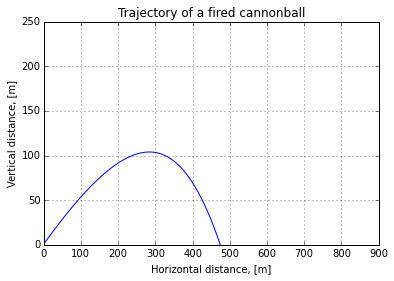

In [20]:
# Solving equations of motion iteratively
for i in range(N):
    a[i] = F(r[i], v[i], t[i])/m
    v[i+1] = v[i] + a[i]*dt
    r[i+1] = r[i] + v[i]*dt

# Extract x and y coordinates
x = r[:,0]
y = r[:,1]

# Import functionality for plotting
import matplotlib.pyplot as plt
%matplotlib inline 

# Plot figure
plt.plot(x,y)

# Prettify the plot
plt.xlabel('Horizontal distance, [m]')
plt.ylabel('Vertical distance, [m]')
plt.title('Trajectory of a fired cannonball')
plt.grid()
plt.axis([0, 900, 0, 250])

# Makes the plot appear on the screen
plt.show()

 ![plot_cannonball1](figs\plot_cannonball1.svg)

###Numerical Experimentation

Altering parameters lets us immediately see the consequences

 ![plot_cannonball2](figs\plot_cannonball2.svg)
 ![plot_cannonball3](figs\plot_cannonball3.svg)

###Students can use numerical experimentation to build intuition and knowledge
* Numerical results can be compared to known analytical solutions. Are numerical results trustworthy?
* Can study how results are directly changed by parameter choice. Are the parameters chosen reasonable?
* Can look at systems with and without certain contributions, such as air drag. What is important, and what can be ignored?

## Examples of possible projects

You will have a chance to look at some of these today
###Catapults and cannons and sports such as baseball
* Easy to compare with experimental data, either before or after simulation.
* Can look into studies of air drag, Reynolds number etc.
![cannonball](figs\cannonball.svg)

###Skydiving and bungee jumping
<img src="figs\skydiving.jpg" alt="Skydiving" style="width: 500px;" />

* Great study on free fall and terminal velocity
* Can study how parameters such as cross-sectional area and drag coefficient change as the parachute is opened
* Can plot the g-forces affecting the jumper. Which sport is more “extreme”?

###Pendulum and angular motion
![pendulum](figs\pendulum.svg)
* Can solve pendulum problems also for large angles!
* Energy can be plotted as functions of time
* Can also simulate double pendulum and chaotic systems

###Modeling the solar system
<img src="figs\exopl_GJ1214b_ESO.svg" alt="solar system" style="width: 500px;" />
* Students can gather real data of planetary orbits from NASA webpages
* Can combine numerical simulation with better graphics
